# 1. Data Balancing

Data balancing addresses the problem of imbalanced datasets where some classes have many more samples than others. Imbalanced data can cause machine learning models to be biased toward majority classes, resulting in poor predictive performance on minority classes. Balancing techniques aim to create a more even class distribution to improve model fairness and accuracy.

# 2. Why Data Balancing is Important

When classes are imbalanced, models tend to favour the majority class, leading to misleadingly high overall accuracy but poor recall or precision for minority classes. This is critical in fields like medical diagnosis or fraud detection, where minority class detection is vital.

# 3. Common Techniques for Data Balancing

## 3.1 Random Undersampling

Randomly removes samples from the majority class to balance with the minority class.  
Simple but may discard useful information.

In [ ]:
%pip install imbalanced-learn

In [29]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Dataset with 18 samples: 8 majority class, 10 minority class
data = {
    'feature1': list(range(1, 21)),
    'feature2': list(range(21, 1, -1)),
    'target':   [0]*12 + [1]*5 + [2]*3
}

df = pd.DataFrame(data)
X = df.drop('target', axis=1)
y = df['target']

def plot_class_distribution(y_before, y_after, method_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    axes[0].bar(Counter(y_before).keys(), Counter(y_before).values(), color='skyblue')
    axes[0].set_title('Original Class Distribution')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].set_xticks(sorted(Counter(y_before).keys()))
    
    axes[1].bar(Counter(y_after).keys(), Counter(y_after).values(), color='lightgreen')
    axes[1].set_title(f'Resampled Class Distribution ({method_name})')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')
    axes[1].set_xticks(sorted(Counter(y_after).keys()))
    
    plt.suptitle(f'Class Distribution Before and After {method_name}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

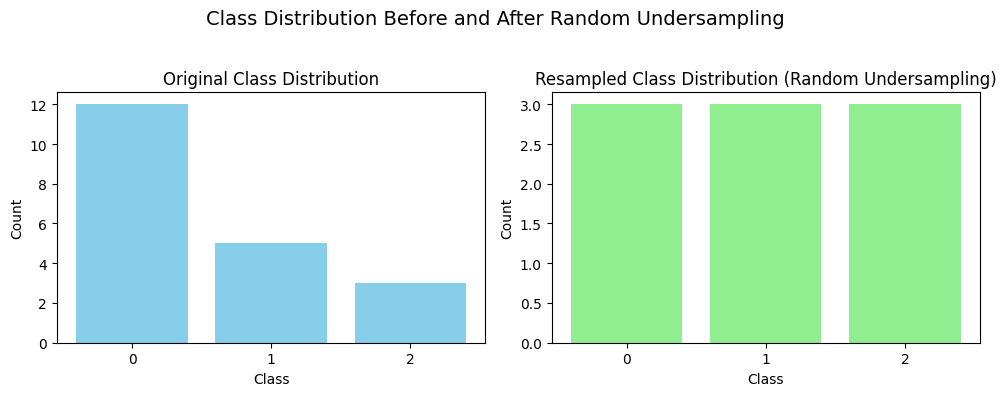

In [30]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
plot_class_distribution(y, y_rus, 'Random Undersampling')

## 3.2 Random Oversampling

Duplicates samples from the minority class to match the majority class count.  
Easy to implement but can cause overfitting.

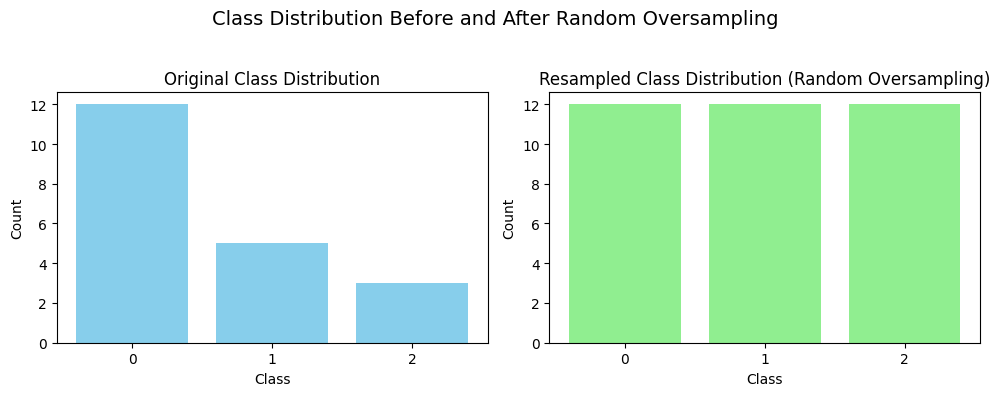

In [31]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
plot_class_distribution(y, y_ros, 'Random Oversampling')

## 3.3 SMOTE (Synthetic Minority Over-sampling Technique)

Generates synthetic minority class examples by interpolating between existing samples.  
Reduces overfitting compared to simple oversampling.

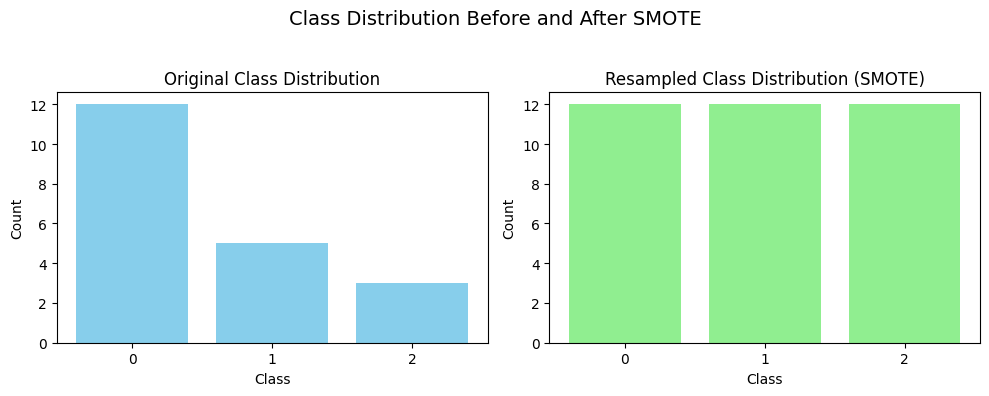

In [34]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_smote, y_smote = smote.fit_resample(X, y)
plot_class_distribution(y, y_smote, 'SMOTE')


## 3.4 Tomek Links and Edited Nearest Neighbours

Undersampling methods that clean overlapping or noisy samples near class boundaries.  
Improve class separability and data quality.

# 4. When to Use Each Technique

| Technique              | Use Case                            | Pros                               | Cons                         |
| ---------------------- | ---------------------------------- | ---------------------------------- | ---------------------------- |
| Random Undersampling    | When dataset is large               | Simple, fast                      | May lose important data       |
| Random Oversampling     | Small datasets                     | Easy to implement                 | Risk of overfitting           |
| SMOTE                  | When synthetic data can help       | Creates new samples, reduces overfitting | More complex, may create noise |
| Tomek Links / ENN      | When cleaning noisy data            | Improves data quality             | May remove borderline cases   |

# 5. Summary

Data balancing is essential for training fair and accurate models on imbalanced datasets. Selecting the right method depends on the dataset size, domain, and tolerance for overfitting or data loss. Techniques like SMOTE are widely used for their balance between effectiveness and robustness.